# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [3]:
#From the pairplot it was determined that the only variables that could be used are
#total_bill, tip and size. These variables are assigned here.
x1 = sm.add_constant(tips[['total_bill']])
x2 = sm.add_constant(tips[['tip']])
x3 = sm.add_constant(tips[['size']])
y = tips.tip

lm1 = sm.OLS(y, x1).fit()
lm2 = sm.OLS(y, x2).fit()
lm3 = sm.OLS(y, x3).fit()

# Residual Sum of Squares
RSS = sum(lm1.resid ** 2)

# Total Sum of Squares
TSS = sum((tips.tip - np.mean(tips.tip)) ** 2)
R2 = 1 - (RSS/TSS)

print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

#The summary of total_bill and tip is shown.
lm1.summary()
#lm2.summary()
#lm3.summary()

#Pairplots were originally used to determine the available variables.
#sns.pairplot(tips)

RSS: 252.78874385077594; TSS: 465.21247704918085; R-squared: 0.4566165863516771


C:\Users\Bairdx2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.69e-34
Time:                        17:26:35   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

**tip(total_bill) = 0.9203 + 0.1050total_bill**

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

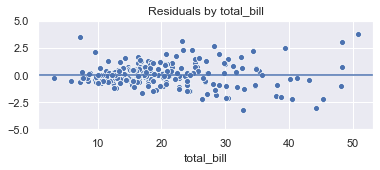

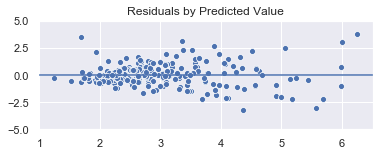

Mean:  1.1011228358987207e-15


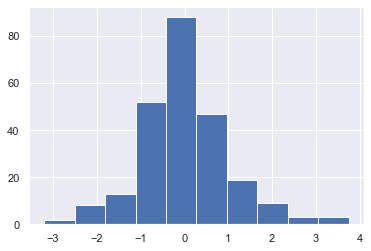

In [4]:
plt.figure(figsize=(6,2))
sns.scatterplot(tips['total_bill'], lm1.resid)
plt.title("Residuals by total_bill")
plt.ylim(-5, 5)
#Put a horizontal line through the mean of the predictions.
plt.axhline(np.mean(lm1.resid))
plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm1.predict(), lm1.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-5, 5)
plt.axhline(np.mean(lm1.resid))
plt.show()

print("Mean: ",np.mean(lm1.resid))
plt.hist(lm1.resid)
plt.show()

4) Does your model meet the four assumptions expected of a linear model? Explain:

The four assumptions expected of a linear model are as follows:

1. Linearity
2. Homoscedasticity
3. Independence
4. Normality

This model does not meet the second assumption because variance increases along the x-axis, the first assumption because the relationship between x and y does not seem linear and the fourth assumption because x and y are not normally distributed.


Assumption list was taken from: [Simple Linear Regression](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html)